In [1]:
QTD_OF_SUMMARIES = 15
QTD_OF_TEST_SUMMARIES = 2
NR_EPOCHS = 100
BATCH_SIZE = 200

In [2]:
import datautils.loader.data_loader as loader
summaries = loader.load_anomalous_summaries()

In [ ]:
import datautils.loader.data_loader as loader
loader.load_mne_data(summaries[:QTD_OF_SUMMARIES])
loader.load_time_segmented_data(summaries[:QTD_OF_SUMMARIES])

In [4]:
import datautils.splitter.time_splitter as splitter
X_train, X_val, y_train, y_val = splitter.segmented_time_data_splitter(summaries[:QTD_OF_SUMMARIES])

In [5]:
import datautils.balancer.data_balancer as balancer
X_train, y_train = balancer.balance(X_train, y_train)
X_val, y_val = balancer.balance(X_val, y_val)

In [6]:
X_train[0].shape

(19, 1280)

In [7]:
import ia.model.cnn as ia
time_cnn = ia.TimeCNN(input_shape=(X_train[0].shape[0], X_train[0].shape[1]))

In [8]:
time_cnn.compile()

In [9]:
history = time_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
2/2 [==============================] - 1s 188ms/step - loss: 0.6932 - accuracy: 0.5294 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 53ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

In [10]:
time_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 32)            122912    
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
import datautils.loader.data_loader as loader
loader.load_mne_data(summaries[QTD_OF_SUMMARIES + 1 : QTD_OF_SUMMARIES + 1 + QTD_OF_TEST_SUMMARIES])
loader.load_time_segmented_data(summaries[QTD_OF_SUMMARIES + 1 : QTD_OF_SUMMARIES + 1 + QTD_OF_TEST_SUMMARIES])

In [12]:
import datautils.splitter.time_splitter as splitter
X_test, _, y_test, _ = splitter.segmented_time_data_splitter(summaries[QTD_OF_SUMMARIES + 1 : QTD_OF_SUMMARIES + 1 + QTD_OF_TEST_SUMMARIES])

import datautils.balancer.data_balancer as balancer
X_test, y_test = balancer.balance(X_train, y_train)

In [13]:
predictions = time_cnn.model.predict(X_test)
for i in range(len(y_test)):
    print(str(predictions[i] > 0.5) + ":" + str(y_test[i]))

10/10 [==============================] - 0s 2ms/step
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:False
[False]:F

In [14]:
test_loss, test_acc = time_cnn.model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9412
Test accuracy: 0.9411764740943909


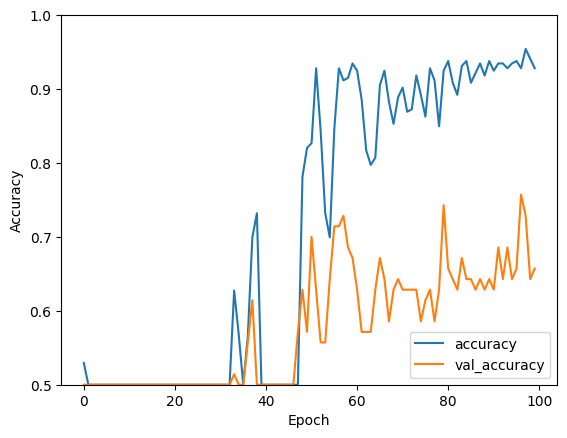

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [18]:
test_loss, test_acc = time_cnn.model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9412
Test accuracy: 0.9411764740943909
